### Problem Statement for the Advertising data
The dataset file consists of advertising expenditure incurred on different mediums and the overall increase in revenue that was seen during that time. For any business, advertising their products is very essential because it aids in the fast selling of a product, increases the popularity and awareness of the product in the market, which in turn, increases the overall sales for the product. But more than that, what matters for the business is that correct amount of investment should be done upon the advertisements such that it generates good return on investments otherwise it will just lead to an added expenditure.
The dataset contains statistics about the increase in sales of a product in 200 different months, together with advertising budgets in each of these months for different media channels: TV, radio and newspaper. The budget and the increase in sales is in thousands of dollars. 
You are expected to implement regression technique and predict what would be the increase in sales given the advertisement expenditure for that month. You are free to use any ML algorithms, evaluate, fine tune and reach a best model. Also derive additional/meaningful insights from the data which can help the organization to decide upon the right channels and amount of investments to be done on each media channel. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\dell\Downloads\Advertising.csv",index_col=0,header=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
print(data.dtypes)

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object


In [4]:
print(data.shape)

(200, 4)


In [5]:
print(data.describe())

               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [6]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

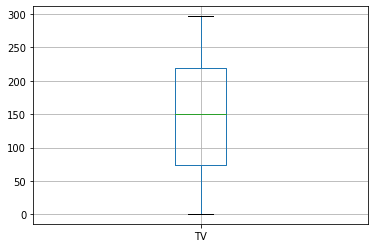

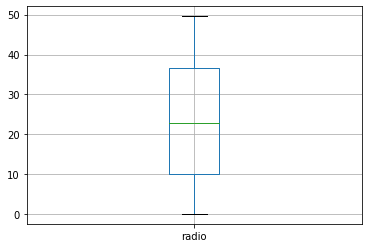

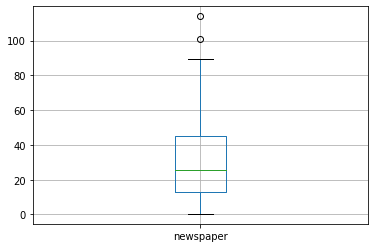

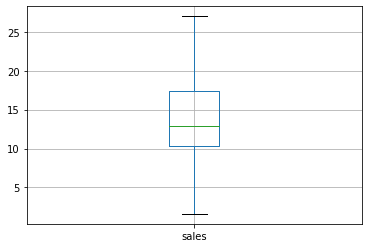

In [7]:
# assumption 1: there should be no outlier in the data.
#check using boxplot
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

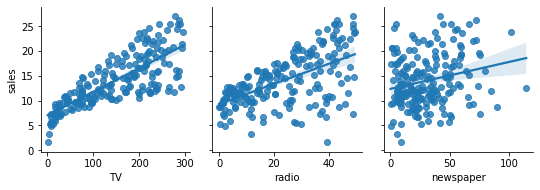

In [8]:
#assumption 2: assumption of linearity:every ind var should have a 
#linear relationship with the dep var.

sns.pairplot(data,x_vars=['TV','radio','newspaper'],
            y_vars='sales',kind='reg')
plt.show()

In [9]:
#data.drop(['newspaper'],axis=1,inplace=True)

In [10]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [11]:
# create x and y
x = data.loc[:,['TV','radio','newspaper']]
y = data.loc[:,'sales']

In [12]:
print(x.shape)

(200, 3)


In [13]:
print(y.shape)

(200,)


In [14]:
import warnings


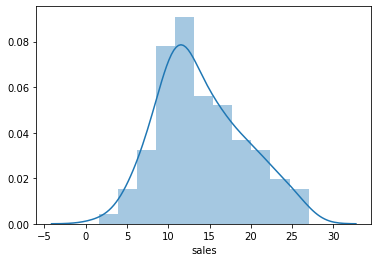

In [15]:
# assumption of normality: The dependent variable should follow an 
#approximate normal distribution

sns.distplot(y)
plt.show()

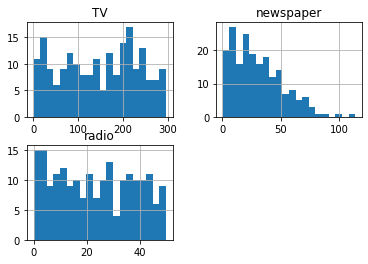

In [16]:
x.hist(bins=20)
plt.show()

In [17]:
from scipy.stats import skew

import numpy as np

#finding the skewness in each variable
data_num_skew = x.apply(lambda i: skew(i.dropna()))

#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]

print(data_num_skew)
print(data_num_skewed)

# apply log + 1 transformation for all numeric features with skewness over .75
x[data_num_skewed.index] = np.log1p(x[data_num_skewed.index])

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


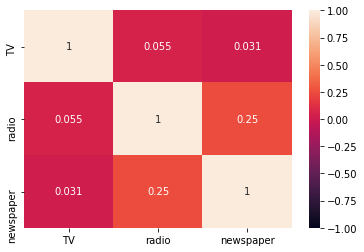

In [18]:
#Assumption of no multicollinearity: There should be no multicollinearity 
#between the independent variables
#multicollinearity is the relationship amongst the independent variables

corr_df=x.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = x.columns
vif_df["VIF Factor"] = [vif(x.values, i) for i in range(x.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [20]:
#x.drop('newspaper',axis=1,inplace=True)
#rerun the VIF code

In [21]:
from sklearn.model_selection import train_test_split 

In [22]:
#split the data into test and train 

x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state = 10)

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape,)
print('percent of train data',x_train.shape[0]/x.shape[0]*100)

(160, 3)
(160,)
(40, 3)
(40,)
percent of train data 80.0


In [24]:
#>1000--->test_size = 0.3
#<1000--->tesr_size = 0.2

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
# create a model object 
lm = LinearRegression()

#train the model object 
lm.fit(x_train,y_train)

# print intercept and cofficients 
print(lm.intercept_)
print(lm.coef_)

3.353291385815151
[ 0.0437425   0.19303708 -0.04895137]


In [27]:
# pair the feature names with the cofficinets

print(list(zip(x.columns,lm.coef_)))

[('TV', 0.04374250157742167), ('radio', 0.19303707897345293), ('newspaper', -0.04895136822248788)]


In [28]:
X1=100
X2=200
X3=np.log1p(0)
Y_pred=3.3532913858151474+(0.0437425*X1)+(0.19303708*X2)+(-0.04895137*X3)
print(Y_pred)

46.334957385815144


In [29]:
#predict using the model

y_pred=lm.predict(x_test)
print(y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [30]:
new_df=pd.DataFrame()
new_df=x_test.copy()

new_df["Actual sales"]=y_test
new_df["Predicted sales"]=y_pred
new_df=new_df.reset_index().drop("index", axis=1)

In [31]:
new_df

,TV,radio,newspaper,Actual sales,Predicted sales
0,210.7,29.5,2.332144,18.4,18.150269
1,8.7,48.9,4.330733,7.2,12.961369
2,218.4,27.7,3.996364,18.0,18.058153
3,283.6,42.0,4.207673,25.5,23.660251
4,216.4,41.7,3.703768,22.6,20.687510
5,147.3,23.9,3.000720,14.6,14.263259
6,188.4,18.1,3.280911,14.9,14.927745
7,198.9,49.4,4.110874,23.7,21.388474
8,216.8,43.9,3.339322,22.3,21.147529
9,17.2,45.9,4.252772,9.3,12.757885


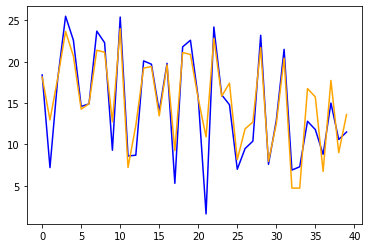

In [32]:
new_df['Actual sales'].plot(color = 'blue')

new_df['Predicted sales'].plot(color = 'orange')

plt.show()

In [33]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE',rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.834801071903532
RMSE 2.59297691109306
Adj R-square: 0.8322725168816474


In [34]:
print(y_test.min())
print(y_test.max())

1.6
25.5


In [35]:
new_df['Deviation']=new_df['Actual sales']-new_df['Predicted sales']
new_df.to_excel('sales Prediction.xlsx',header=True,index=True)
new_df.head()

,TV,radio,newspaper,Actual sales,Predicted sales,Deviation
0,210.7,29.5,2.332144,18.4,18.150269,0.249731
1,8.7,48.9,4.330733,7.2,12.961369,-5.761369
2,218.4,27.7,3.996364,18.0,18.058153,-0.058153
3,283.6,42.0,4.207673,25.5,23.660251,1.839749
4,216.4,41.7,3.703768,22.6,20.687510,1.912490


In [36]:
from sklearn.model_selection import train_test_split 
#split the data into test and train 

x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state = 10)

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape,)

(160, 3)
(160,)
(40, 3)
(40,)


In [38]:
from sklearn.linear_model import Ridge 
lm = Ridge(alpha=1.0)
lm.fit(x_train,y_train)


"""

previous values:
3.3522471725966003
[0.04374234  0.19302603 -0.04853131]
"""

print(lm.intercept_)
print(lm.coef_)

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)


3.3522471725965985
[ 0.04374234  0.19302603 -0.04853131]
R-squared: 0.834801071903532


In [39]:
from sklearn.linear_model import Lasso

lm = Lasso()
lm.fit(x_train,y_train)


print(lm.intercept_)
print(lm.coef_)

r2=r2_score(y_test,y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print(adjusted_r_squared)

3.336794058220317
[ 0.04362374  0.18766033 -0.        ]
0.834801071903532
2.59297691109306
0.8322725168816474


In [40]:
#OLS-->OLS (y_train,x_train)
#ols-->ols(y~x1+x2+x3)

In [41]:
#fit(x_train, y_train)-->sklearn
#y~x1+x2+x3,data=df-->statsmodel

In [42]:
import pandas as pd
import numpy as np

In [43]:
new_df=pd.DataFrame()
new_df=x_train.copy()

new_df['sales']=y_train.copy()
new_df.shape

(160, 4)

In [44]:
import statsmodels.formula.api as sm

In [45]:
#create a fitted model with all three function
lm_model = sm.ols(formula='sales ~ TV + radio + newspaper',
                data=new_df).fit()

#print the coefficient 

print(lm_model.params)
print(lm_model.summary())

Intercept    3.353291
TV           0.043743
radio        0.193037
newspaper   -0.048951
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           1.10e-85
Time:                        13:07:51   Log-Likelihood:                -276.63
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [46]:
lm.score(x_train,y_train)

0.9206144717341345

In [47]:
y_pred_new=lm_model.predict(x_test)

In [48]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print(adjusted_r_squared)

0.8348010719035378
2.5929769110930145
0.8322725168816532


In [49]:
import statsmodels.formula.api as sm

In [50]:
#create a fitted model with two function 
lm_model = sm.ols(formula = 'sales ~ TV + radio ',data =new_df).fit()

#print the coefficient 

print(lm_model.params)
print(lm_model.summary())

Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           3.47e-87
Time:                        13:07:52   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [51]:
y_pred_new=lm_model.predict(x_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print(adjusted_r_squared)

0.8354496662944216
2.587881707737811
0.8329310387377036


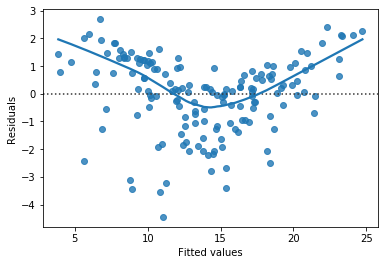

In [52]:
#Assumption: Errors should be random
#checked using Residual v/s Fitted plot
model_fitted_y = lm_model.fittedvalues
sns.residplot(data=new_df, y='sales',x=model_fitted_y, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()# the line should be random line ,and shoud not follow wave like pattern

In [53]:
sns.residplot?

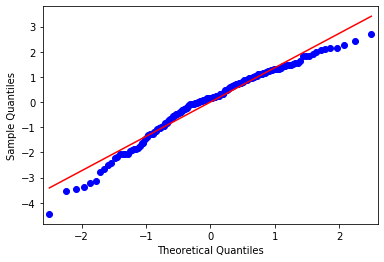

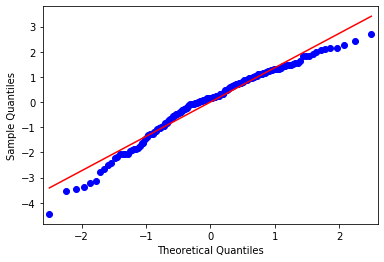

In [54]:
#Assumption: Errors should follow a approximate normal distribution
#checked using Normal QQ plot

import statsmodels.api as sma
sma.qqplot(lm_model.resid, line='s')#the error point should follow the red diagonal point if not if not the error are skewed 

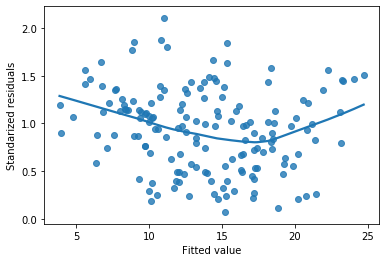

In [55]:
#Assumption: Errors should follow a constant variance-->Homoskedasticity
#checked using Scale location plot
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(lm_model.resid))

sns.regplot(x=lm_model.fittedvalues,
            y=model_norm_residuals_abs_sqrt,
              scatter=True, lowess=True)        
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show() 
# the should be an appoximatly horizontal line
# if it shows the steep curve the the curve do not follow constant variable Lasso turn out the best model in term of  r^2 .in future we use Lasso.

In [56]:
sns.regplot?